### Ex. 2

Let's calculate FFT for each signal

In [1]:
import matplotlib.pyplot as plt
import numpy as np

N = 88
A = 2
n = np.arange(N)

def generate_signal(phase):
    return A * np.sin(2 * np.pi * (n - phase) / N)

signals = [generate_signal(phase) for phase in (0, N/4, N/2, 3*N / 4)]
ffts = [np.fft.fft(signal) for signal in signals]

print(ffts[0][:5])

[ 2.44929360e-16+0.00000000e+00j -1.11060666e-14-8.80000000e+01j
  1.04178112e-15-4.36144914e-15j -2.94838665e-15-4.42206036e-15j
  1.39569290e-15-1.54708238e-15j]


The result contains very small numbers that are side effects of algorithm's approximation, let's round them down.

In [2]:
for fft in ffts:
    fft.real[np.abs(fft.real) < 1e-10] = 0
    fft.imag[np.abs(fft.imag) < 1e-10] = 0
print(ffts[0][:5])

[0. +0.j 0.-88.j 0. +0.j 0. +0.j 0. +0.j]


Now, let's plot their magnitudes and phases. To see plots for other phase shifts, adjust `index` (0..3).

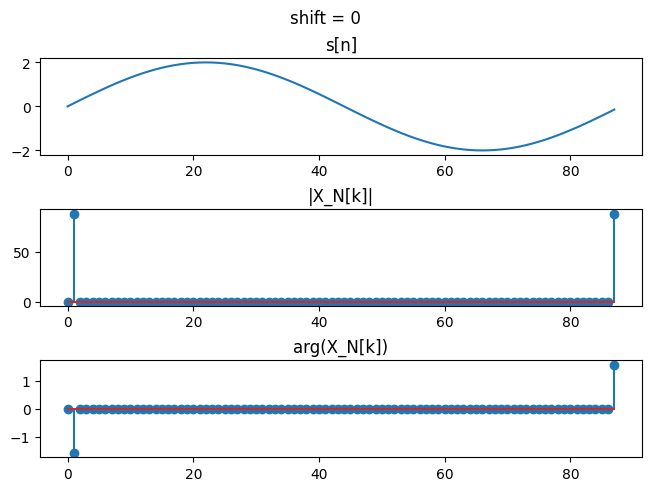

In [5]:
index = 0

ffts_amplitude = np.abs(ffts)
ffts_argument = np.angle(ffts)
fig, (ax1, ax2, ax3) = plt.subplots(3, layout='constrained')
fig.suptitle(f"shift = {index * 22}")
ax1.plot(signals[index])
ax1.set_title("s[n]")
ax2.stem(n, ffts_amplitude[index])
ax2.set_title("|X_N[k]|")
ax3.stem(n, ffts_argument[index])
ax3.set_title("arg(X_N[k])")
plt.show()

### Ex. 4

As in Ex. 3:

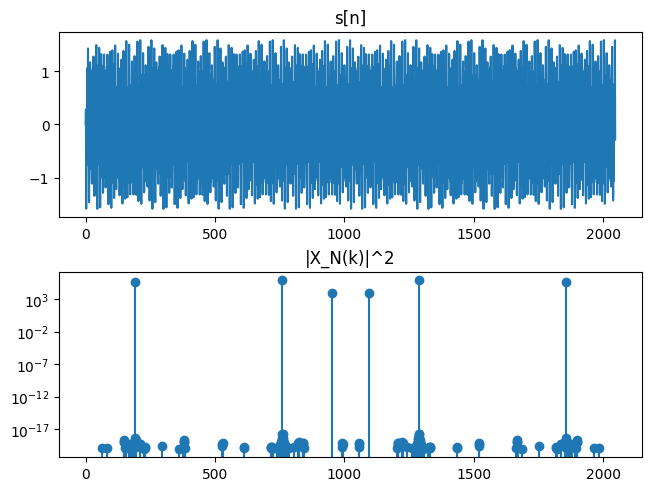

In [8]:
N = 2048
n = np.arange(N)
f_s = 48000
As = [0.1, 0.7, 0.9]
fs = [3000, 8000, 11000]
signal = [sum([A * np.sin(2 * np.pi * f * i/N) for A, f in zip(As, fs)])
     for i in n]
fft = np.fft.fft(signal)
fft.real[np.abs(fft.real) < 1e-10] = 0
fft.imag[np.abs(fft.imag) < 1e-10] = 0
fft_energy = np.abs(fft) ** 2
fig, (ax1, ax2) = plt.subplots(2, layout='constrained')
ax1.plot(signal)
ax1.set_title("s[n]")
ax2.stem(n, fft_energy)
ax2.set_title("|X_N(k)|^2")
ax2.set_yscale('log')
plt.show()